## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### YOUR CODE HERE
##TRAIN
import os
import os.path
from pathlib import Path
No_Data_Path = Path("sample_data/No")
Yes_Data_Path = Path("sample_data/Yes")

No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [ ]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('sample_data/No/no887.jpg'), PosixPath('sample_data/No/no20.jpg'), PosixPath('sample_data/No/no282.jpg'), PosixPath('sample_data/No/no1295.jpg'), PosixPath('sample_data/No/no875.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('sample_data/Yes/y701.jpg'), PosixPath('sample_data/Yes/y271.jpg'), PosixPath('sample_data/Yes/y439.jpg'), PosixPath('sample_data/Yes/y1082.jpg'), PosixPath('sample_data/Yes/y136.jpg')]


In [ ]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [ ]:
print(Yes_No_List[0:10])

[PosixPath('sample_data/No/no887.jpg'), PosixPath('sample_data/No/no20.jpg'), PosixPath('sample_data/No/no282.jpg'), PosixPath('sample_data/No/no1295.jpg'), PosixPath('sample_data/No/no875.jpg'), PosixPath('sample_data/No/no1249.jpg'), PosixPath('sample_data/No/no170.jpg'), PosixPath('sample_data/No/no358.jpg'), PosixPath('sample_data/No/no534.jpg'), PosixPath('sample_data/No/no1059.jpg')]


In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [ ]:
print(JPG_Labels[0:10])
print("NO COUNTING: ", JPG_Labels.count("No"))
print("YES COUNTING: ", JPG_Labels.count("Yes"))

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']
NO COUNTING:  1500
YES COUNTING:  1130


In [ ]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")


In [ ]:
##TEST
Prediction_Path = Path("drive/MyDrive/pred")
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))


In [ ]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [ ]:
print(Test_Data.head())

                             JPG TUMOR_CATEGORY
0  drive/MyDrive/pred/pred33.jpg           pred
1  drive/MyDrive/pred/pred53.jpg           pred
2  drive/MyDrive/pred/pred48.jpg           pred
3  drive/MyDrive/pred/pred22.jpg           pred
4  drive/MyDrive/pred/pred45.jpg           pred


In [ ]:
# Main Train Data
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)
print(Main_Train_Data.head(-1))

                            JPG TUMOR_CATEGORY
0      sample_data/No/no887.jpg             No
1       sample_data/No/no20.jpg             No
2      sample_data/No/no282.jpg             No
3     sample_data/No/no1295.jpg             No
4      sample_data/No/no875.jpg             No
...                         ...            ...
2624   sample_data/Yes/y991.jpg            Yes
2625   sample_data/Yes/y721.jpg            Yes
2626   sample_data/Yes/y119.jpg            Yes
2627   sample_data/Yes/y222.jpg            Yes
2628   sample_data/Yes/y619.jpg            Yes

[2629 rows x 2 columns]


In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
print(Main_Train_Data.head(-1))

                            JPG TUMOR_CATEGORY
0     sample_data/No/no1076.jpg             No
1       sample_data/Yes/y40.jpg            Yes
2      sample_data/Yes/y699.jpg            Yes
3      sample_data/Yes/y311.jpg            Yes
4      sample_data/No/no390.jpg             No
...                         ...            ...
2624   sample_data/No/no321.jpg             No
2625   sample_data/Yes/y855.jpg            Yes
2626   sample_data/No/no658.jpg             No
2627   sample_data/No/no566.jpg             No
2628   sample_data/No/no124.jpg             No

[2629 rows x 2 columns]


Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

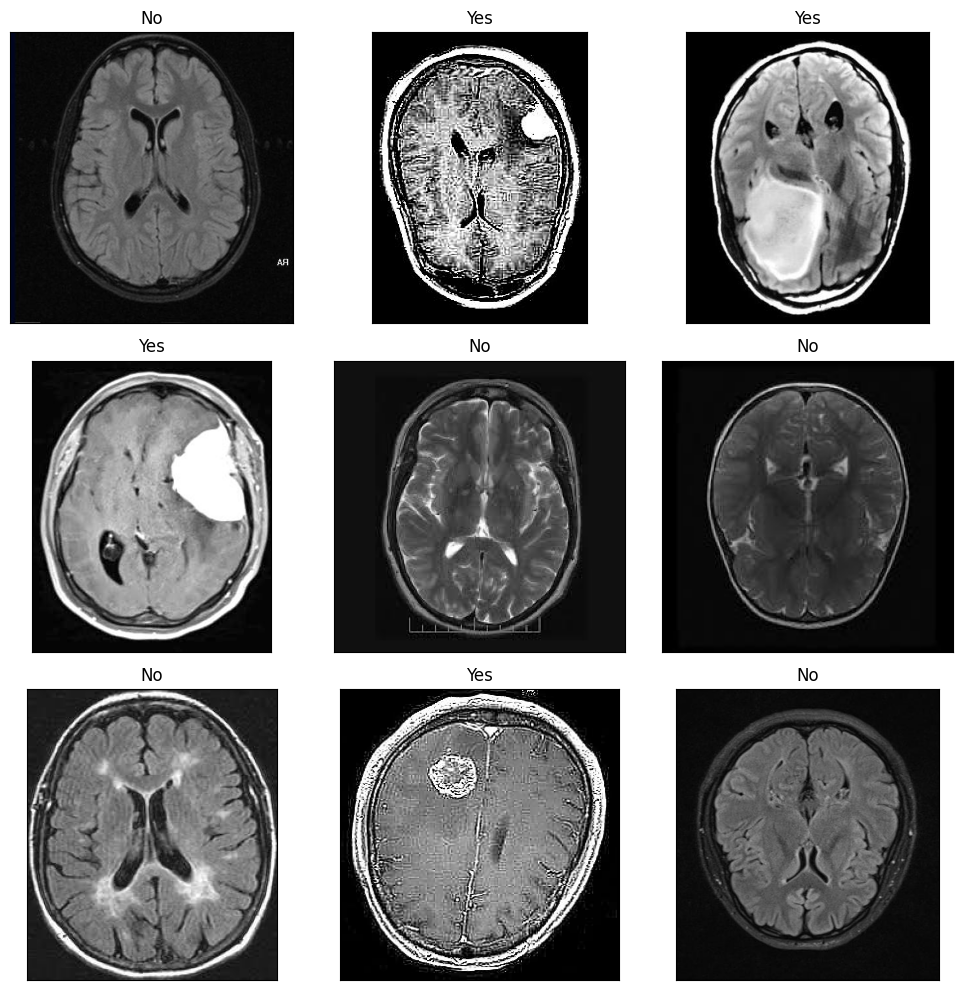

In [ ]:
### YOUR CODE HERE
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [ ]:
### YOUR CODE HERE
import cv2
from PIL import Image
image_sizes = [Image.open(str(img)).size for img in Yes_JPG_Path + No_JPG_Path]
widths, heights = zip(*image_sizes)
print("Average Image Width:", np.mean(widths))
print("Average Image Height:", np.mean(heights))
# Means and standard deviation of pixel values
pixel_means = []
pixel_stds = []

for img_path in Yes_JPG_Path + No_JPG_Path:
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    pixel_means.append(np.mean(img))
    pixel_stds.append(np.std(img))

print("Mean of Pixel Values:", np.mean(pixel_means))
print("Standard Deviation of Pixel Values:", np.mean(pixel_stds))

# Sample frequency
tumor_counts = JPG_Labels.count("Yes")
no_tumor_counts = JPG_Labels.count("No")

print("Tumor Frequency:", tumor_counts)
print("No Tumor Frequency:", no_tumor_counts)


Average Image Width: 321.3631178707224
Average Image Height: 346.1893536121673
Mean of Pixel Values: 71.5222720991898
Standard Deviation of Pixel Values: 66.946703767964
Tumor Frequency: 1130
No Tumor Frequency: 1500


Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

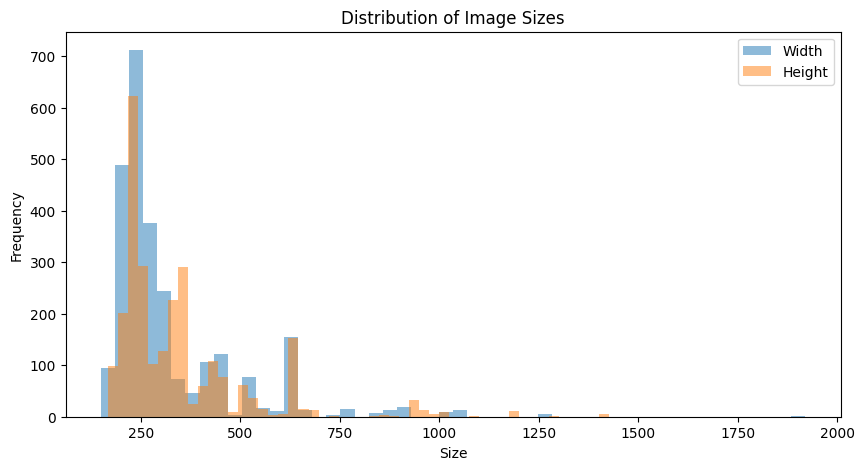

In [ ]:
### YOUR CODE HERE
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=50, alpha=0.5, label='Width')
plt.hist(heights, bins=50, alpha=0.5, label='Height')
plt.title('Distribution of Image Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?


**1. Answer**: The dataset appears to be slightly imbalanced, with more images without tumors (i.e No = 1500) compared to images with tumors (i.e Yes = 1130). This might affect the performance of machine learning models, especially if the class imbalance is significant.

**2. Answer:** The Image sizes shows some variation, with average width around 321 pixels and average height around 346 pixels.
The histograms of image sizes show the distribution of width and height values.
Pixel values have an average mean of around 71.52 and an average standard deviation of around 66.95. These statistics can provide insights into the overall brightness and contrast of the images.
